In [6]:
%load_ext autoreload

%autoreload 2


In [5]:
results

OrderedDict([('U_PSNR', tensor(16.5856, device='cuda:0')),
             ('U_SSIM', tensor(0.4268, device='cuda:0'))])

In [6]:
import os
import json
import argparse

from src.datamodule import DataModule
from src.utils.config_reader import Config, object_from_dict
from src.trainers.trainer import Trainer

config = Config('./configs/inter.yaml')
datamodule = DataModule(config)
datamodule.setup()
trainer = Trainer(config)
trainer.restore_checkpoint()
# trainer.fit(datamodule.train_dataloader(), datamodule.val_dataloader())
datamodule.setup('test')
results = trainer.test(datamodule.val_dataloader())
print(results)
results = trainer.test(datamodule.test_dataloader())
print(results)

[2022-02-19 12:40:40|INFO] - ================ Session (Sat Feb 19 12:40:40 2022) ================
[2022-02-19 12:40:40|INFO] - ---------------------------- Testing ----------------------------
C:\Users\Dymok\Desktop\text-rsisr\venv\lib\site-packages\torch\nn\functional.py:3631: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
[2022-02-19 12:40:40|INFO] - (Epoch: 0/100, Iters: 0/810, Time: 0.005007, Eta: 0:06:45.575100) U_Psnr: 18.465, U_Ssim: 0.595
[2022-02-19 12:40:40|INFO] - (Epoch: 0/100, Iters: 50/810, Time: 0.001149, Eta: 0:01:32.995360) U_Psnr: 21.523, U_Ssim: 0.575
[2022-02-19 12:40:40|INFO] - (Epoch: 0/100, Iters: 100/810, Time: 0.001155, Eta: 0:01:33.479950) U_Psnr: 22.414, U_Ssim: 0.603
[2022-02-19 12:40:40|INFO] - (Epoch: 0/100, Iters: 150/810, Time: 0.001136, Eta: 0:01:31.829430) U_Psnr:

OrderedDict([('U_PSNR', tensor(19.8702, device='cuda:0')), ('U_SSIM', tensor(0.6616, device='cuda:0'))])


[2022-02-19 12:40:43|INFO] - (Epoch: 0/100, Iters: 0/1411, Time: 0.002193, Eta: 0:05:09.418190) U_Psnr: 17.215, U_Ssim: 0.718
[2022-02-19 12:40:44|INFO] - (Epoch: 0/100, Iters: 50/1411, Time: 0.002086, Eta: 0:04:54.230300) U_Psnr: 14.228, U_Ssim: 0.485
[2022-02-19 12:40:44|INFO] - (Epoch: 0/100, Iters: 100/1411, Time: 0.001497, Eta: 0:03:31.133400) U_Psnr: 13.626, U_Ssim: 0.507
[2022-02-19 12:40:44|INFO] - (Epoch: 0/100, Iters: 150/1411, Time: 0.001631, Eta: 0:03:49.903545) U_Psnr: 15.055, U_Ssim: 0.498
[2022-02-19 12:40:44|INFO] - (Epoch: 0/100, Iters: 200/1411, Time: 0.001236, Eta: 0:02:54.166490) U_Psnr: 15.466, U_Ssim: 0.316
[2022-02-19 12:40:44|INFO] - (Epoch: 0/100, Iters: 250/1411, Time: 0.001194, Eta: 0:02:48.231240) U_Psnr: 13.464, U_Ssim: 0.247
[2022-02-19 12:40:44|INFO] - (Epoch: 0/100, Iters: 300/1411, Time: 0.001212, Eta: 0:02:50.677760) U_Psnr: 20.399, U_Ssim: 0.667
[2022-02-19 12:40:44|INFO] - (Epoch: 0/100, Iters: 350/1411, Time: 0.001184, Eta: 0:02:46.662075) U_Psnr: 1

OrderedDict([('U_PSNR', tensor(16.5856, device='cuda:0')), ('U_SSIM', tensor(0.4268, device='cuda:0'))])


In [17]:
batch = next(iter(datamodule.test_dataloader()))
batch[:2] = [t.cuda() for t in batch[:2]]
model = trainer.model
logs = model.training_step(batch)
logs

OrderedDict([('losses',
              OrderedDict([('loss_G',
                            tensor(15.4698, device='cuda:0', grad_fn=<AddBackward0>)),
                           ('loss_G_GAN',
                            tensor(0.2645, device='cuda:0', grad_fn=<DivBackward0>)),
                           ('loss_G_cyc',
                            tensor(1.0137, device='cuda:0', grad_fn=<DivBackward0>)),
                           ('loss_G_identity',
                            tensor(1.0137, device='cuda:0', grad_fn=<DivBackward0>)),
                           ('loss_D',
                            tensor(0.4125, device='cuda:0', grad_fn=<DivBackward0>)),
                           ('loss_D_A',
                            tensor(0.3361, device='cuda:0', grad_fn=<DivBackward0>)),
                           ('loss_D_A_real',
                            tensor(0.4439, device='cuda:0', grad_fn=<MseLossBackward>)),
                           ('loss_D_A_fake',
                            tenso

In [3]:
%load_ext autoreload

%autoreload 2

In [6]:
from src.datamodule import DataModule
datamodule = DataModule(config)
datamodule.setup('test')
batch = next(iter(datamodule.test_dataloader()))
batch[:2] = [t.cuda() for t in batch[:2]]

aaaa 30 211
aaaa -0.75686276 0.654902
aaaa tensor(-0.7569) tensor(0.6549)
aaaa 0 161
aaaa -1.0 0.26274514
aaaa tensor(-1.) tensor(0.2627)


In [7]:
batch[0]

tensor([[[[-0.2392, -0.0902,  0.0118,  ..., -0.1451, -0.1373, -0.1451],
          [-0.2314, -0.0902, -0.0118,  ..., -0.1216, -0.1294, -0.1608],
          [-0.2314, -0.0980, -0.0196,  ..., -0.1059, -0.1373, -0.1529],
          ...,
          [-0.3333, -0.3176, -0.2706,  ..., -0.0118, -0.0039,  0.0039],
          [-0.3412, -0.3255, -0.2863,  ..., -0.0039,  0.0118,  0.0039],
          [-0.3647, -0.3490, -0.3020,  ..., -0.0039, -0.0039, -0.0039]],

         [[ 0.0118,  0.1294,  0.1922,  ...,  0.0353,  0.0431,  0.0431],
          [ 0.0118,  0.1294,  0.1608,  ...,  0.0667,  0.0667,  0.0510],
          [ 0.0118,  0.1216,  0.1529,  ...,  0.0980,  0.0824,  0.0824],
          ...,
          [ 0.0196,  0.0353,  0.0745,  ...,  0.2627,  0.2706,  0.2706],
          [ 0.0118,  0.0275,  0.0588,  ...,  0.2706,  0.2784,  0.2706],
          [ 0.0118,  0.0275,  0.0588,  ...,  0.2549,  0.2549,  0.2549]],

         [[ 0.0039,  0.1373,  0.1922,  ...,  0.0980,  0.1059,  0.0980],
          [ 0.0039,  0.1373,  

tensor(211., device='cuda:0') tensor(31., device='cuda:0')


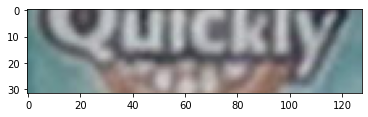

In [15]:
from src.datamodule import denormalize

batch = next(iter(datamodule.test_dataloader()))
batch[:2] = [t.cuda() for t in batch[:2]]

d = denormalize(batch[0].clone(), model.means.cpu().numpy(), model.stds.cpu().numpy(), max_value=255.0).permute(0, 2, 3, 1)
print(d.max(), d.min())
plt.imshow(d[0].byte().cpu().numpy())

In [20]:
lr.shape

torch.Size([1, 3, 32, 128])

[2022-02-12 10:07:33|WARNING] - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.uint8


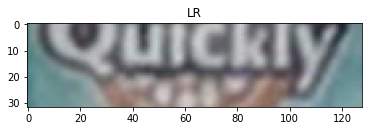

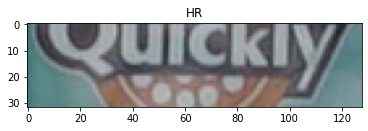

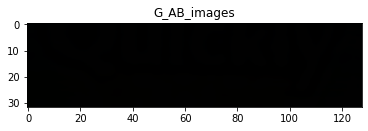

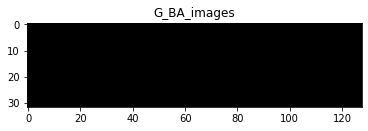

In [34]:
from matplotlib import pyplot as plt
from src.datamodule import denormalize

# lr = denormalize(logs['images']['LR'], model.means, model.stds) * 255
# lr = lr.byte()
# print(lr)
batch = next(iter(datamodule.test_dataloader()))
batch[:2] = [t.cuda() for t in batch[:2]]
logs = model.eval_step(batch)
lr = model.parse_outputs(logs['images']['LR'])
print(lr.dtype)
hr = model.parse_outputs(logs['images']['HR'])
ab_pred = model.parse_outputs(logs['images']['G_AB_images'])

for key, image in logs['images'].items():
    plt.figure()
    plt.title(key)
    plt.imshow(image.permute(0, 2, 3, 1).cpu().numpy()[0])


In [37]:
logs['images']['G_AB_images'].min()

tensor(0.0012, device='cuda:0')

In [32]:
from torchmetrics.functional import ssim

ssim(batch[1], batch[1])

tensor(1.0000, device='cuda:0')